In [6]:
####   
#Fz Einfluss auf Reifenmodelle
####

import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.insert(0, os.path.abspath('../model'))

import Pacejka52 as pa52
import fiala as fi
import Brush as br
import TMeasy as tm
import Dugoff as du
import Pacejka52_glSA as pa52gl

sys.path.insert(0, os.path.abspath('../model/parameter'))
import Pacejka_Params_Indy as pa
import Params_fit_at_Pa52 as pam

i=1000
Sx = np.linspace(0,1,i)
Sy = np.linspace(0,0.3,i)
Fz0 = 3114
IA = 0

iter = 1000 #
Fz = np.linspace(1500,5000,iter)


In [7]:
#Vergleichsgrößen

def Fy_intervall(y,Fz,Fx_intv): #Fz in [kN], Fx_intv in % (z.b 10% von Fx_max)
#x Position von Fx_max berechnene
    Fx_w=y
    w=len(Fx_w)
    Fx_max_pos=0
    for j in range(0,w):
        if Fx_w[j] == np.max(y):
            break
        else:
            Fx_max_pos = Fx_max_pos + 1

    #cut slop
    Fx_w_pos_max=Fx_w[0:((Fx_max_pos)+1)] #von 0 bis Fx_max
    Fx_w_max_end=Fx_w[((Fx_max_pos)+1)::] #von Fx_max bis Ende(+100% slipratio)

    Fx_max_ref = np.max(y) * Fx_intv #Referenzwert Fx 10% weniger als Fx_max

    left=0
    j=0
    for j in range(0,len(Fx_w_pos_max)):
        if Fx_w_pos_max[j] < Fx_max_ref:
            left +=1
        else:
            break
        
    right = 0
    j=0
    for j in range(0,len(Fx_w_max_end)):
        if Fx_w_max_end[j] > Fx_max_ref:
            right +=1
        else:
            break
        
#Intervall 10% abweichung von Fx_max = [left,right]
    Fx_max_10=Fx_w[left:len(Fx_w_pos_max)+right]
    Fx_slope_b=((len(Fx_w_pos_max)+right)-left)/(cut/100) #breite des Intervalls in %Schlupf
    
    return Fx_slope_b,Fx_max_10,cut,left,right,Fx_w_pos_max

#ableiten
def diff_Pacejka(y,SL): #y = Funktion die abgleitet werden soll, Sl = linspace
    dx = SL[1]-SL[0]
    dydx = np.gradient(y, dx)
    return dydx



(1500.0, 5000.0)

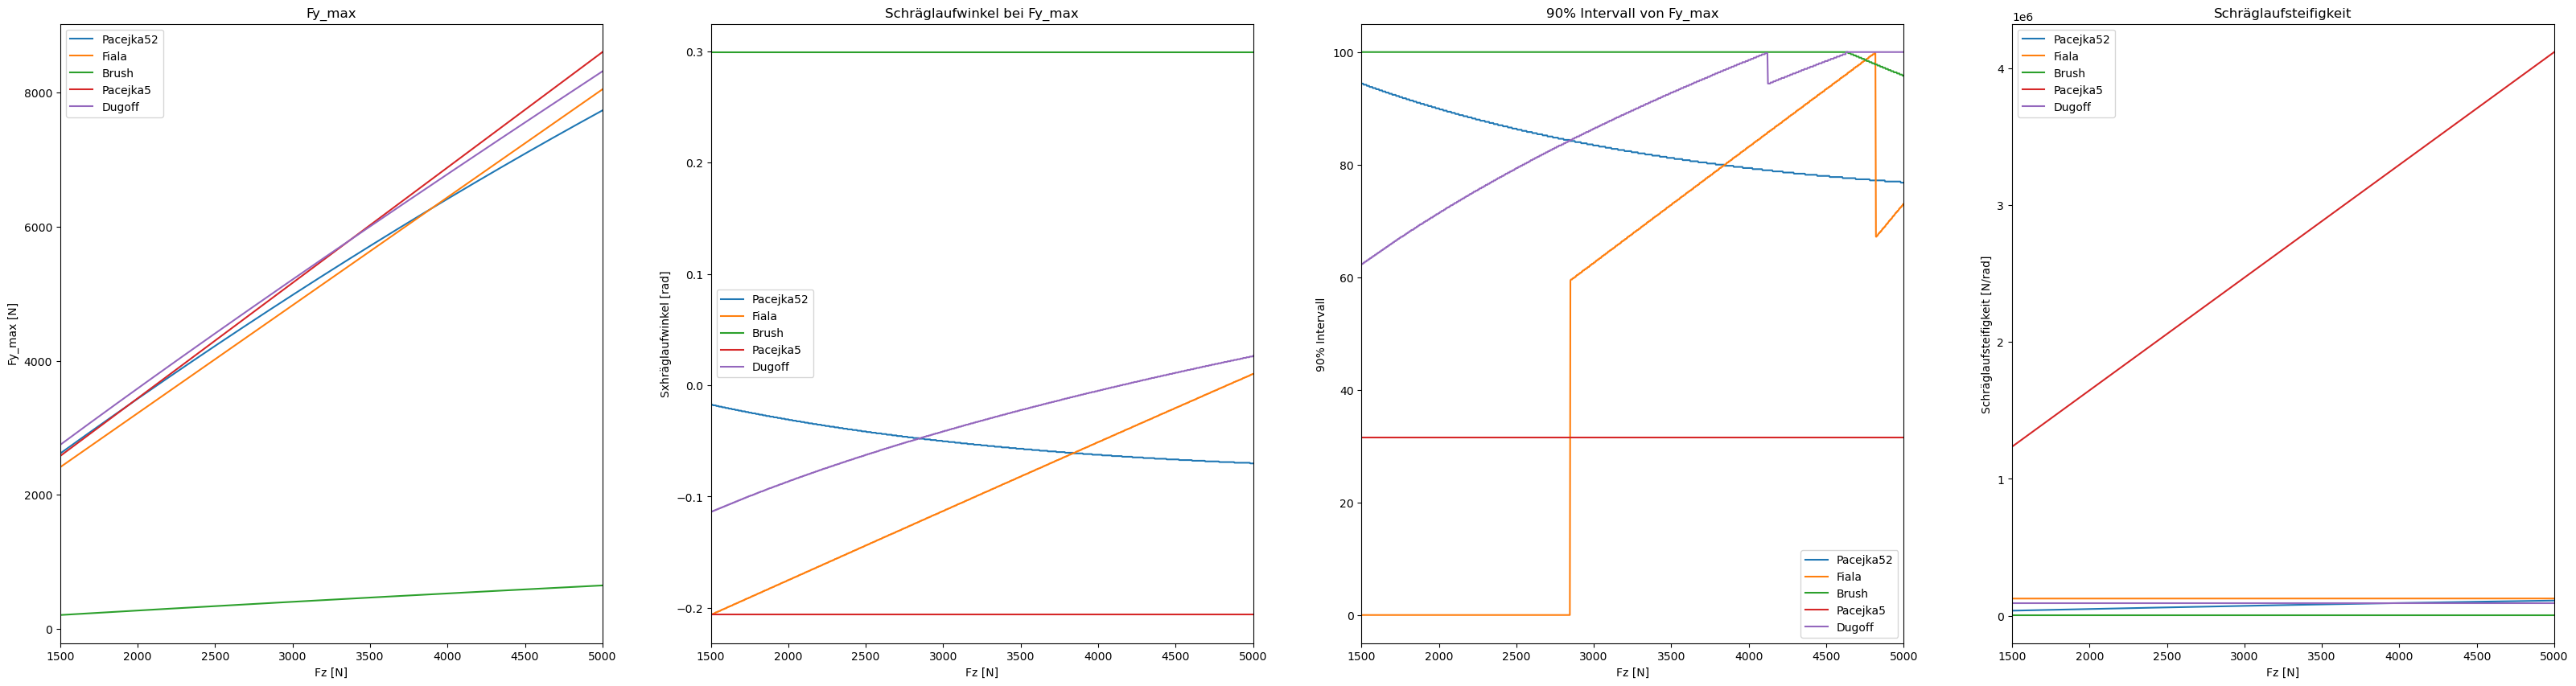

In [8]:
IA = 0
Fz0 = 3114

#Fy_max
fig, ax = plt.subplots(1,4, figsize =(40,10))
Fy_max_pa = np.zeros(len(Fz))
Fy_max_fiala = np.zeros(len(Fz))
Fy_max_brush = np.zeros(len(Fz))
Fy_max_pa5 = np.zeros(len(Fz))
Fy_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy_max_pa[j] = np.max(pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0])
    Fy_max_fiala[j] = np.max(fi.fiala_lat(Sy,Fz[j],pam.C_lat,pam.mu1,pam.mu2))
    Fy_max_brush[j] = np.max(br.brush_lat(Sy, Fz[j], pam.mu_lat, pam.Ca_lat))
    Fy_max_pa5[j] = np.max(pa52.Pacejka5_lat_pa(Sy,Fz[j],pam.B_lat,pam.C_lat,pam.D_lat,pam.E_lat))
    Fy_max_dugoff[j] = np.max(du.dugoff_lat(Sx,Sy,Fz[j],pam.Cs_lat,pam.Ca_lat,pam.mu_lat))
ax[0].plot(Fz,Fy_max_pa, label = 'Pacejka52')
ax[0].plot(Fz,Fy_max_fiala, label = 'Fiala')
ax[0].plot(Fz,Fy_max_brush, label = 'Brush')
ax[0].plot(Fz,Fy_max_pa5, label = 'Pacejka5')
ax[0].plot(Fz,Fy_max_dugoff, label = 'Dugoff')
ax[0].legend()
ax[0].set_xlabel('Fz [N]')
ax[0].set_ylabel('Fy_max [N]')
ax[0].set_title('Fy_max')
ax[0].set_xlim(1500,5000)

#Slip at Fy_max
Fy_max_pa = np.zeros(len(Fz))
Fy_max_fiala = np.zeros(len(Fz))
Fy_max_brush = np.zeros(len(Fz))
Fy_max_pa5 = np.zeros(len(Fz))
Fy_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy_max_pa[j] = (np.argmax(pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0]) - (i/2))  / (i/2 )* 0.3 
    Fy_max_fiala[j] = (np.argmax(fi.fiala_lat(Sy,Fz[j],pam.C_lat,pam.mu1,pam.mu2))- (i/2))  / (i/2)* 0.3  
    Fy_max_brush[j] = (np.argmax(br.brush_lat(Sy, Fz[j], pam.mu_lat, pam.Ca_lat))- (i/2))  / (i/2)* 0.3 
    Fy_max_pa5[j] = (np.argmax(pa52.Pacejka5_lat_pa(Sy,Fz[j],pam.B_lat,pam.C_lat,pam.D_lat,pam.E_lat))- (i/2))  / (i/2)* 0.3  
    Fy_max_dugoff[j] = (np.argmax(du.dugoff_lat(Sx,Sy,Fz[j],pam.Cs_lat,pam.Ca_lat,pam.mu_lat))- (i/2))  / (i/2)* 0.3 
ax[1].plot(Fz,Fy_max_pa, label = 'Pacejka52')
ax[1].plot(Fz,Fy_max_fiala, label = 'Fiala')
ax[1].plot(Fz,Fy_max_brush, label = 'Brush')
ax[1].plot(Fz,Fy_max_pa5, label = 'Pacejka5')
ax[1].plot(Fz,Fy_max_dugoff, label = 'Dugoff')
ax[1].legend()
ax[1].set_xlabel('Fz [N]')
ax[1].set_ylabel('Sxhräglaufwinkel [rad]')
ax[1].set_title('Schräglaufwinkel bei Fy_max')
ax[1].set_xlim(1500,5000)

#90% intervall
Fy_max_pa = np.zeros(len(Fz))
Fy_max_fiala = np.zeros(len(Fz))
Fy_max_brush = np.zeros(len(Fz))
Fy_max_pa5 = np.zeros(len(Fz))
Fy_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy_max_pa[j] = Fy_intervall(pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0],Fz[j],0.9)[0]
    Fy_max_fiala[j] = Fy_intervall(fi.fiala_lat(Sy,Fz[j],pam.C_lat,pam.mu1,pam.mu2),Fz[j],0.9)[0]
    Fy_max_brush[j] = Fy_intervall(br.brush_lat(Sy, Fz[j], pam.mu_lat, pam.Ca_lat),Fz[j],0.9)[0]
    Fy_max_pa5[j] = Fy_intervall(pa52.Pacejka5_lat_pa(Sy,Fz[j],pam.B_lat,pam.C_lat,pam.D_lat,pam.E_lat),Fz[j],0.9)[0] 
    Fy_max_dugoff[j] = Fy_intervall(du.dugoff_lat(Sx,Sy,Fz[j],pam.Cs_lat,pam.Ca_lat,pam.mu_lat),Fz[j],0.9)[0] 
ax[2].plot(Fz,Fy_max_pa, label = 'Pacejka52')
ax[2].plot(Fz,Fy_max_fiala, label = 'Fiala')
ax[2].plot(Fz,Fy_max_brush, label = 'Brush')
ax[2].plot(Fz,Fy_max_pa5, label = 'Pacejka5')
ax[2].plot(Fz,Fy_max_dugoff, label = 'Dugoff')
ax[2].legend()
ax[2].set_xlabel('Fz [N]')
ax[2].set_ylabel('90% Intervall')
ax[2].set_title('90% Intervall von Fy_max')
ax[2].set_xlim(1500,5000)

#Schräglaufsteifigkeit


Fy_max_pa = np.zeros(len(Fz))
Fy_max_fiala = np.zeros(len(Fz))
Fy_max_brush = np.zeros(len(Fz))
Fy_max_pa5 = np.zeros(len(Fz))
Fy_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy_max_pa[j] = diff_Pacejka(pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0],Sy)[0]
    Fy_max_fiala[j] = diff_Pacejka(fi.fiala_lat(Sy,Fz[j],pam.C_lat,pam.mu1,pam.mu2),Sy)[0]
    Fy_max_brush[j] = diff_Pacejka(br.brush_lat(Sy, Fz[j], pam.mu_lat, pam.Ca_lat),Sy)[0]
    Fy_max_pa5[j] = diff_Pacejka(pa52.Pacejka5_lat_pa(Sy,Fz[j],pam.B_lat,pam.C_lat,pam.D_lat,pam.E_lat),Sy)[0]
    Fy_max_dugoff[j] = diff_Pacejka(du.dugoff_lat(Sx,Sy,Fz[j],pam.Cs_lat,pam.Ca_lat,pam.mu_lat),Sy)[0]
ax[3].plot(Fz,Fy_max_pa, label = 'Pacejka52')
ax[3].plot(Fz,Fy_max_fiala, label = 'Fiala')
ax[3].plot(Fz,Fy_max_brush, label = 'Brush')
ax[3].plot(Fz,Fy_max_pa5, label = 'Pacejka5')
ax[3].plot(Fz,Fy_max_dugoff, label = 'Dugoff')
ax[3].legend()
ax[3].set_xlabel('Fz [N]')
ax[3].set_ylabel('Schräglaufsteifigkeit [N/rad]')
ax[3].set_title('Schräglaufsteifigkeit')
ax[3].set_xlim(1500,5000)

(1500.0, 5000.0)

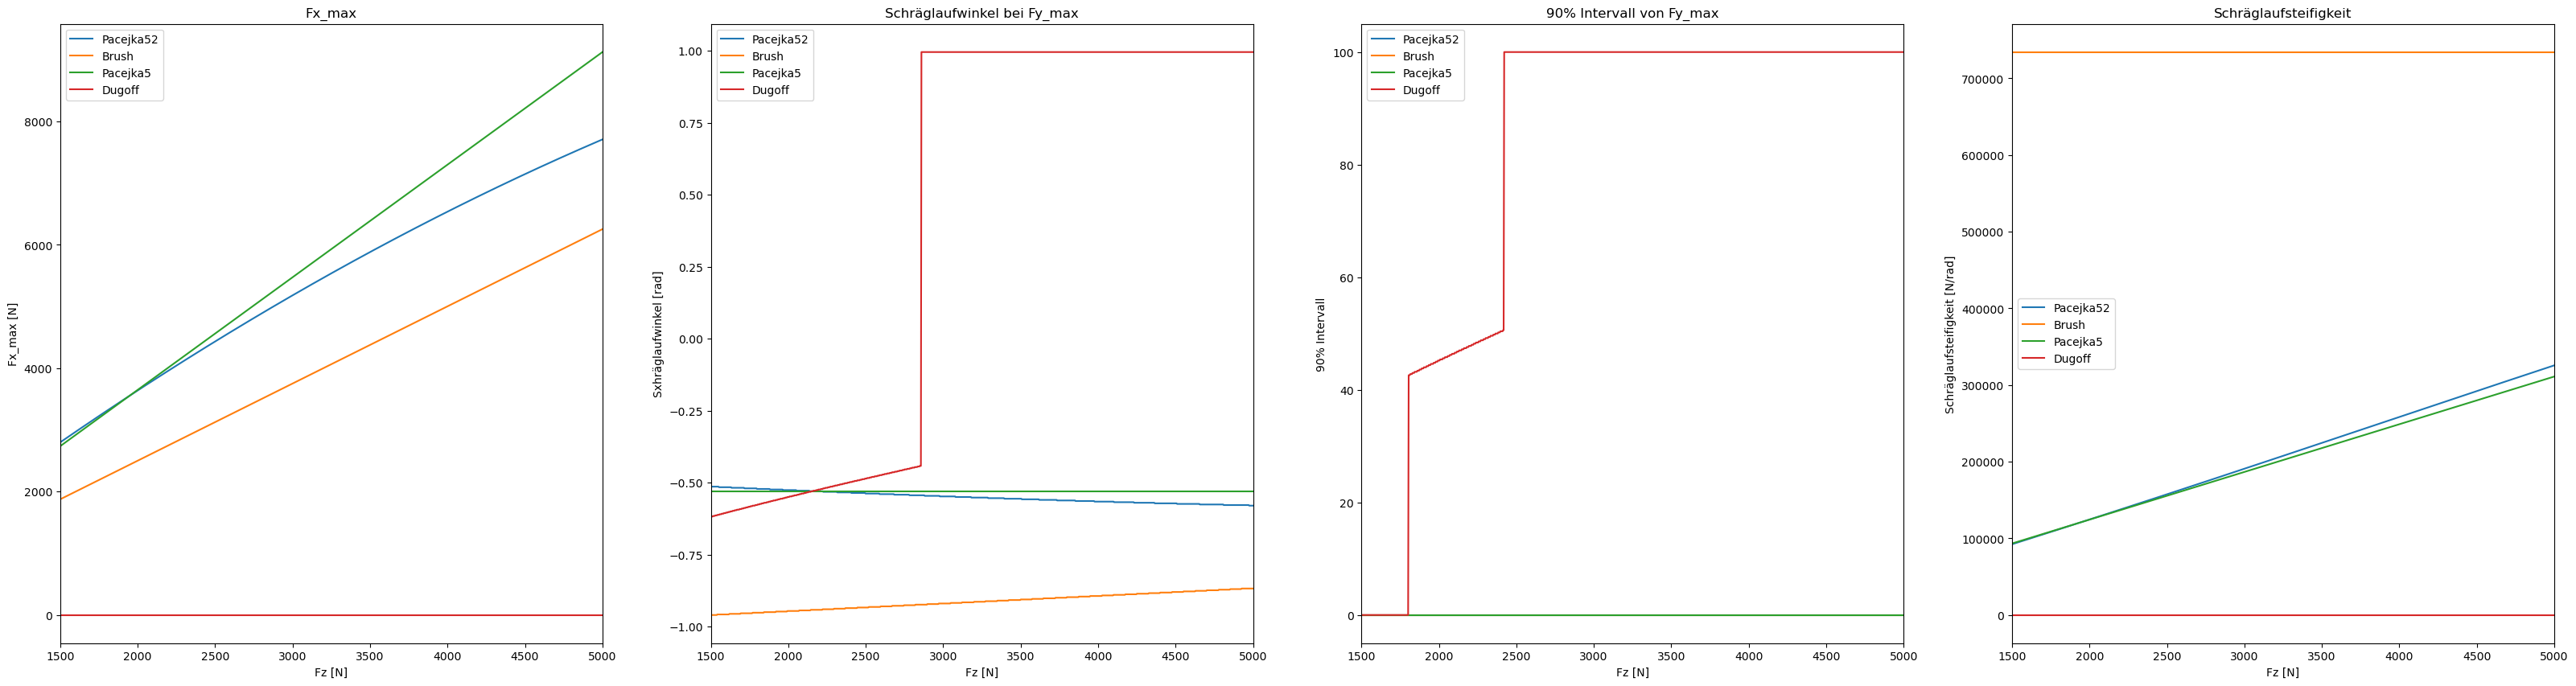

In [9]:
IA = 0
Fz0 = 3114

#Fy_max
fig, ax = plt.subplots(1,4, figsize =(40,10))
Fx_max_pa = np.zeros(len(Fz))
Fx_max_brush = np.zeros(len(Fz))
Fx_max_pa5 = np.zeros(len(Fz))
Fx_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fx_max_pa[j] = np.max(pa52.Pacejka52_long(Fz[j],Sy,IA,Fz0)[0])
    Fx_max_brush[j] = np.max(br.brush_long(Sx,Fz[j],pam.mu_long,pam.kt_long,pam.lam_long))
    Fx_max_pa5[j] = np.max(pa52.Pacejka5_long_pa(Sy,Fz[j],pam.B_long,pam.C_long,pam.D_long,pam.E_long))
    Fx_max_dugoff[j] = np.max(du.dugoff_long(Sx,Sy,Fz[j],pam.Cs_lat,pam.Ca_lat,pam.mu_lat))
ax[0].plot(Fz,Fx_max_pa, label = 'Pacejka52')
ax[0].plot(Fz,Fx_max_brush, label = 'Brush')
ax[0].plot(Fz,Fx_max_pa5, label = 'Pacejka5')
ax[0].plot(Fz,Fx_max_dugoff, label = 'Dugoff')
ax[0].legend()
ax[0].set_xlabel('Fz [N]')
ax[0].set_ylabel('Fx_max [N]')
ax[0].set_title('Fx_max')
ax[0].set_xlim(1500,5000)

#Slip at Fy_max

Fx_max_pa = np.zeros(len(Fz))
Fx_max_brush = np.zeros(len(Fz))
Fx_max_pa5 = np.zeros(len(Fz))
Fx_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fx_max_pa[j] = (np.argmax(pa52.Pacejka52_long(Fz[j],Sy,IA,Fz0)[0])- (i/2))  / (i/2 )
    Fx_max_brush[j] = (np.argmax(br.brush_long(Sx,Fz[j],pam.mu_long,pam.kt_long,pam.lam_long))- (i/2))  / (i/2 )
    Fx_max_pa5[j] = (np.argmax(pa52.Pacejka5_long_pa(Sy,Fz[j],pam.B_long,pam.C_long,pam.D_long,pam.E_long))- (i/2))  / (i/2 )
    Fx_max_dugoff[j] = (np.argmax(du.dugoff_long(Sx,Sy,Fz[j],pam.Cs_lat,pam.Ca_lat,pam.mu_lat))- (i/2))  / (i/2 )
ax[1].plot(Fz,Fx_max_pa, label = 'Pacejka52')
ax[1].plot(Fz,Fx_max_brush, label = 'Brush')
ax[1].plot(Fz,Fx_max_pa5, label = 'Pacejka5')
ax[1].plot(Fz,Fx_max_dugoff, label = 'Dugoff')
ax[1].legend()
ax[1].set_xlabel('Fz [N]')
ax[1].set_ylabel('Sxhräglaufwinkel [rad]')
ax[1].set_title('Schräglaufwinkel bei Fy_max')
ax[1].set_xlim(1500,5000)

#90% intervall

Fx_max_pa = np.zeros(len(Fz))
Fx_max_brush = np.zeros(len(Fz))
Fx_max_pa5 = np.zeros(len(Fz))
Fx_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fx_max_pa[j] = Fy_intervall(pa52.Pacejka52_long(Fz[j],Sy,IA,Fz0)[0],Fz[j],0.9)[0]
    Fx_max_brush[j] = Fy_intervall(br.brush_long(Sx,Fz[j],pam.mu_long,pam.kt_long,pam.lam_long),Fz[j],0.9)[0]
    Fx_max_pa5[j] = Fy_intervall(pa52.Pacejka5_long_pa(Sy,Fz[j],pam.B_long,pam.C_long,pam.D_long,pam.E_long),Fz[j],0.9)[0]
    Fx_max_dugoff[j] = Fy_intervall(du.dugoff_long(Sx,Sy,Fz[j],pam.Cs_lat,pam.Ca_lat,pam.mu_lat),Fz[j],0.9)[0]
ax[2].plot(Fz,Fx_max_pa, label = 'Pacejka52')
ax[2].plot(Fz,Fx_max_brush, label = 'Brush')
ax[2].plot(Fz,Fx_max_pa5, label = 'Pacejka5')
ax[2].plot(Fz,Fx_max_dugoff, label = 'Dugoff')
ax[2].legend()
ax[2].set_xlabel('Fz [N]')
ax[2].set_ylabel('90% Intervall')
ax[2].set_title('90% Intervall von Fy_max')
ax[2].set_xlim(1500,5000)

#Schräglaufsteifigkeit
it = len(Sy)/2

Fx_max_pa = np.zeros(len(Fz))
Fx_max_brush = np.zeros(len(Fz))
Fx_max_pa5 = np.zeros(len(Fz))
Fx_max_dugoff = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fx_max_pa[j] = diff_Pacejka(pa52.Pacejka52_long(Fz[j],Sy,IA,Fz0)[0],Sy)[0]
    Fx_max_brush[j] = diff_Pacejka(br.brush_long(Sx,Fz[j],pam.mu_long,pam.kt_long,pam.lam_long),Sy)[0]
    Fx_max_pa5[j] = diff_Pacejka(pa52.Pacejka5_long_pa(Sy,Fz[j],pam.B_long,pam.C_long,pam.D_long,pam.E_long),Sy)[0]
    Fx_max_dugoff[j] = diff_Pacejka(du.dugoff_long(Sx,Sy,Fz[j],pam.Cs_lat,pam.Ca_lat,pam.mu_lat),Sy)[0]
ax[3].plot(Fz,Fx_max_pa, label = 'Pacejka52')
ax[3].plot(Fz,Fx_max_brush, label = 'Brush')
ax[3].plot(Fz,Fx_max_pa5, label = 'Pacejka5')
ax[3].plot(Fz,Fx_max_dugoff, label = 'Dugoff')
ax[3].legend()
ax[3].set_xlabel('Fz [N]')
ax[3].set_ylabel('Schräglaufsteifigkeit [N/rad]')
ax[3].set_title('Schräglaufsteifigkeit')
ax[3].set_xlim(1500,5000)
